<a href="https://colab.research.google.com/github/IrfhanAhmedh/Reservoir-Simulator-1D-2D-/blob/main/1D_Implicit_Heterogeneous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

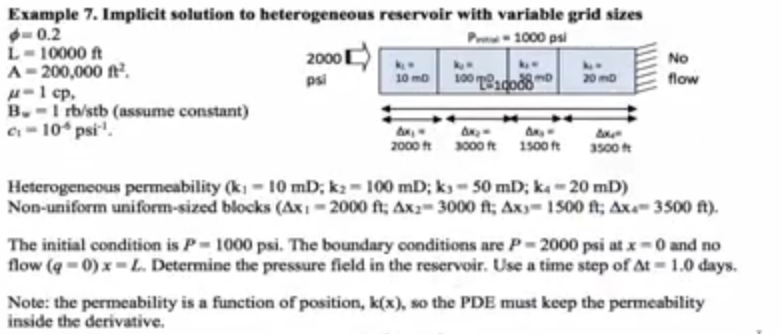

In [ ]:
a=200000   
l=10000   
h=2500      
ct=10**-6  
bw=1
pie=0.2
mu=1
Pb=2000  #pressure at left boundary
dt=1 


In [ ]:
dx=[2000,3000,1500,3500] # ft
k=[10,100,50,20]   # md

In [ ]:
#Permeability
kinterblock=[]
for i in range(len(dx)-1):
 kinterblocki=(dx[i]+dx[i+1])/((dx[i]/k[i])+(dx[i+1]/k[i+1]))
 kinterblock.append(kinterblocki)

In [ ]:
#Transmisbility
tinterblock=[]
for i in range(len(dx)-1):
 tinterblocki=(kinterblock[i]*a*2)/(mu*bw*(dx[i]+dx[i+1]))
 tinterblock.append(tinterblocki)

In [ ]:
T1=k[0]*a/(mu*bw*dx[0])
print(T1)

1000.0


In [ ]:
tinterblock=np.insert(tinterblock,0,T1)

In [ ]:
tinterblock

array([1000.        , 1739.13043478, 6666.66666667, 1951.2195122 ])

In [ ]:
#Accumulation
bi=np.arange(16).reshape(4,4)*0
for i in range(len(dx)):
 bi[i][i]=a*dx[i]*pie*ct  #ft3/psi
print(bi)

[[ 80   0   0   0]
 [  0 120   0   0]
 [  0   0  60   0]
 [  0   0   0 140]]


In [ ]:
import numpy as np
Tmat=np.arange(16).reshape(4,4)*0
Tmat=Tmat.astype(float)
Tmat[0][0]=2*tinterblock[0]+tinterblock[1] #left side dirchlet
Tmat[3][3]=tinterblock[3]    #right side newman
print(Tmat)

[[3739.13043478    0.            0.            0.        ]
 [   0.            0.            0.            0.        ]
 [   0.            0.            0.            0.        ]
 [   0.            0.            0.         1951.2195122 ]]


In [ ]:
tinterblock[1]

1739.1304347826085

In [ ]:
for i in range (1,3):
 Tmat[i][i]=tinterblock[i]+tinterblock[i+1]
for i in range(3):
 Tmat[i][i+1]=-tinterblock[i+1]
 Tmat[i+1][i]=-tinterblock[i+1]

In [ ]:
Tmat

array([[ 3739.13043478, -1739.13043478,     0.        ,     0.        ],
       [-1739.13043478,  8405.79710145, -6666.66666667,     0.        ],
       [    0.        , -6666.66666667,  8617.88617886, -1951.2195122 ],
       [    0.        ,     0.        , -1951.2195122 ,  1951.2195122 ]])

In [ ]:
Tmat=Tmat*6.33*10**-3

In [ ]:
Tmat

array([[ 23.66869565, -11.00869565,   0.        ,   0.        ],
       [-11.00869565,  53.20869565, -42.2       ,   0.        ],
       [  0.        , -42.2       ,  54.55121951, -12.35121951],
       [  0.        ,   0.        , -12.35121951,  12.35121951]])

In [ ]:
#Intial condition
pi=np.arange(4).reshape(4,1)*0+1000
pi

array([[1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
Q=np.arange(4).reshape(4,1)*0
Q[0][0]=2*Pb*tinterblock[0]  #md-ft-psi/cp
Q=Q*6.33*10**-3 #ft3/day
Q  

array([[25320.],
       [    0.],
       [    0.],
       [    0.]])

In [ ]:
for i in range(1,4):
 a=Tmat+(bi/dt)
 b=(bi/dt)@pi+Q
 pnp1=np.linalg.solve(a,b)
 print('At Time= ',i,'days',pnp1.reshape(1,4 ))
 pi=pnp1

At Time=  1 days [[1123.03284655 1008.59817794 1003.19545078 1000.25905742]]
At Time=  2 days [[1219.43568983 1022.34451999 1010.01855651 1001.05026681]]
At Time=  3 days [[1295.61083887 1039.1267879  1019.93999387 1002.58167015]]


**The Results are matching with CMG simulator**